In [1]:
import sys
import json
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

sys.path.append('../')
from src.util.functions import Functions
from src.visualize.visualizer import ChoroplethMap

level = 'province'

path_data = '../data'
path_img = '{path_data}/imgs/mappe/{level}'.format(path_data=path_data, level=level)
path_csv = '{path_data}/csv'.format(path_data=path_data)
path_geojson = '{path_data}/geojson'.format(path_data=path_data)

csv_in_name = '{path_csv}/covid19-{level}.csv'.format(path_csv=path_csv, level=level)
geojson_province_name = '{path_geojson}/Italy_NUTS_3.json'.format(path_geojson=path_geojson)

In [2]:
# Read geojson NUTS 2 file
with open(geojson_province_name, encoding='utf-8') as geojson_province:
    json_province = json.load(geojson_province)
properties = json_province['features'][0]['properties']
properties

{'prov_name': 'Torino',
 'prov_istat_code_num': 1,
 'prov_acr': 'TO',
 'reg_name': 'Piemonte',
 'reg_istat_code': '01',
 'reg_istat_code_num': 1,
 'prov_istat_code': '001'}

In [3]:
df_p = pd.read_csv(csv_in_name)
last_date = df_p.data[0].split('T')[0]
# df_r.sort_values(by='codice_regione').reset_index(drop=True)
df_p.columns
df_p

,data,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,totale_casi,variazione_totale_casi
0,2020-11-28T17:00:00,1,Piemonte,1,Torino,TO,87698,1051
1,2020-11-28T17:00:00,1,Piemonte,2,Vercelli,VC,6270,74
2,2020-11-28T17:00:00,1,Piemonte,3,Novara,NO,12581,168
3,2020-11-28T17:00:00,1,Piemonte,4,Cuneo,CN,22607,419
4,2020-11-28T17:00:00,1,Piemonte,5,Asti,AT,7586,100
...,...,...,...,...,...,...,...,...
144,2020-11-28T17:00:00,9,Toscana,995,In fase di definizione/aggiornamento,NaN,0,0
145,2020-11-28T17:00:00,4,P.A. Trento,996,In fase di definizione/aggiornamento,NaN,0,0
146,2020-11-28T17:00:00,10,Umbria,997,In fase di definizione/aggiornamento,NaN,0,0
147,2020-11-28T17:00:00,2,Valle d'Aosta,998,In fase di definizione/aggiornamento,NaN,0,0


In [4]:
# Define figures properties
fig_prop = {'title': last_date,
            'path_root': path_img,
            'variazione_totale_casi': {'colorbar_title': 'Variazione totale casi', 'file_name': 'variazione_totale_casi'},
            'totale_casi': {'colorbar_title': 'Totale casi', 'file_name': 'totale_casi'}}

In [5]:
# Construct object with dataframe and geojson data
cm = ChoroplethMap(df=df_p,
                   geo_map=json_province,
                   geo_col='codice_provincia',
                   geo_prop='properties.prov_istat_code_num',
                   fig_prop=fig_prop)

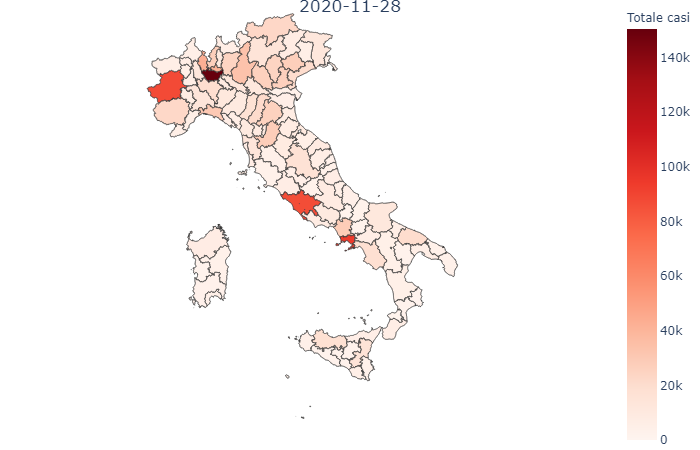

In [6]:
# Total positive cases
col = 'totale_casi'
fig = cm.draw_map(col=col)
cm.save(fig=fig, col=col)

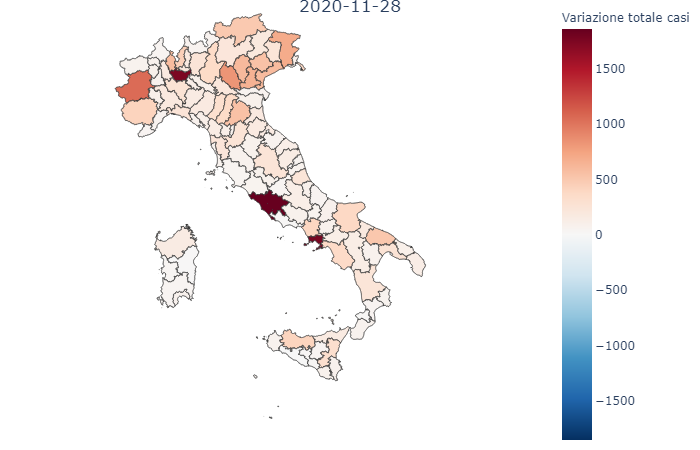

In [7]:
# Variation of total positive cases with respect to the day before
col = 'variazione_totale_casi'
fig = cm.draw_map(col=col, color={'type': 'seq', 'scale': 'RdBu'}, zmid=0, reversescale=True)
cm.save(fig=fig, col=col)